In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("nics-firearm-background-checks.csv")

In [45]:
df1=pd.read_csv("shootings.csv")

In [46]:
numberOfShootings=df1.groupby("Year")["Year"].count()

In [52]:
df1.columns

Index(['Case', 'Location', 'Date', 'Year', 'Summary', 'Fatalities', 'Injured',
       'Total victims', 'Venue', 'Prior signs of mental health issues',
       'Mental health - details', 'Weapons obtained legally', 'Where obtained',
       'Type of weapons', 'Weapon details', 'Race', 'Gender', 'Sources',
       'Mental Health Sources', 'latitude', 'longitude', 'Type'],
      dtype='object')

In [53]:
df1.head()

,Case,Location,Date,Year,Summary,Fatalities,Injured,Total victims,Venue,Prior signs of mental health issues,...,Where obtained,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type
0,Edgewood businees park shooting,"Edgewood, MD",10/18/17,2017,DETAILS PENDING,3,3,6,Workplace,NaN,...,NaN,NaN,NaN,NaN,M,http://www.baltimoresun.com/news/maryland/harf...,NaN,NaN,NaN,NaN
1,Las Vegas Strip massacre,"Las Vegas, NV",10/1/17,2017,"Stephen Craig Paddock, 64, rained a barrage of...",58+,489+,547+,Other,TBD,...,Two gun shops in Nevada,"23 firearms, mostly rifles; including scopes, ...","AR-15-style and AK-47-style rifles and ""a larg...",White,M,https://www.nytimes.com/2017/10/02/us/stephen-...,https://www.nytimes.com/2017/10/13/us/stephen-...,NaN,NaN,Mass
2,San Francisco UPS shooting,"San Francisco, CA",6/14/17,2017,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Workplace,Yes,...,Unclear; the firearm was stolen in Utah. A sec...,two handguns,MAC-10-style “assault pistol”; 30-round magazi...,Asian,M,http://www.nbcbayarea.com/news/local/Active-Sh...,http://www.ktvu.com/news/ktvu-local-news/26177...,NaN,NaN,Mass
3,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/17,2017,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Workplace,Unclear,...,NaN,shotguns,NaN,White,M,http://www.pressconnects.com/story/news/local/...,NaN,NaN,NaN,Mass
4,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Workplace,Unclear,...,NaN,semiautomatic handgun,NaN,NaN,M,http://www.postandcourier.com/news/multiple-pe...,NaN,NaN,NaN,Mass


In [47]:
numberOfShootings=pd.DataFrame(numberOfShootings)

In [48]:
numberOfShootings.columns=["NumberOfShootings"]

In [41]:
numberOfShootings["Year"]=numberOfShootings.index

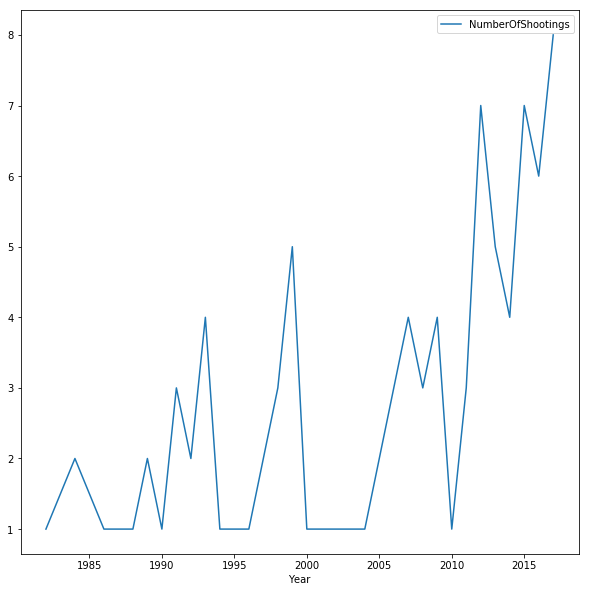

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.lineplot(data=numberOfShootings)

In [74]:
TypeOfShootingComparision=df1.groupby(["Year","Type"])["Type"].count()

In [75]:
Year=[]
for i in range(len(TypeOfShootingComparision)):
    Year.append(TypeOfShootingComparision.index[i][0])
Type=[]
for i in range(len(TypeOfShootingComparision)):
    Type.append(TypeOfShootingComparision.index[i][1])

In [76]:
TypeOfShootingComparision=pd.DataFrame(TypeOfShootingComparision)

In [77]:
TypeOfShootingComparision["Year"]=Year

In [78]:
TypeOfShootingComparision["Mass/Spree"]=Type

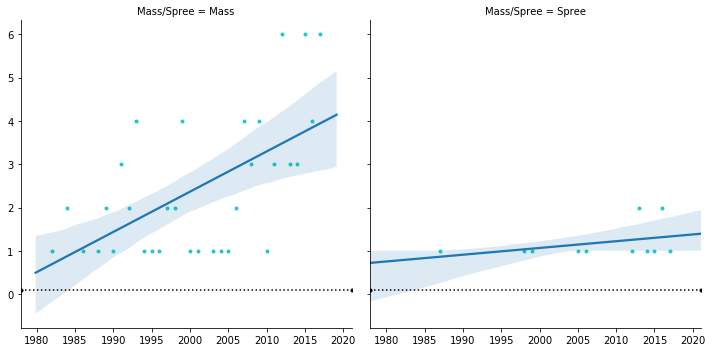

In [84]:
g = sns.lmplot('Year', 'Type', col='Mass/Spree', data=TypeOfShootingComparision,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

In [105]:
NumberOfLongGunsBought=pd.DataFrame({"long_gun":df["long_gun"],"multiple":df["multiple"],"prepawn_long_gun":df["prepawn_long_gun"],"redemption_long_gun":df["redemption_long_gun"],"rentals_long_gun":df["rentals_long_gun"],"private_sale_long_gun":df["private_sale_long_gun"],"return_to_seller_long_gun":df["return_to_seller_long_gun"]})

In [106]:
NumberOfLongGunsBought["Total Long Gun Dealings"]=NumberOfLongGunsBought.sum(axis=1)

In [107]:
NumberOfLongGunsBought["Month"]=pd.to_datetime(df.month)

In [109]:
NumberOfLongGunsBought=NumberOfLongGunsBought.groupby("Month").sum()

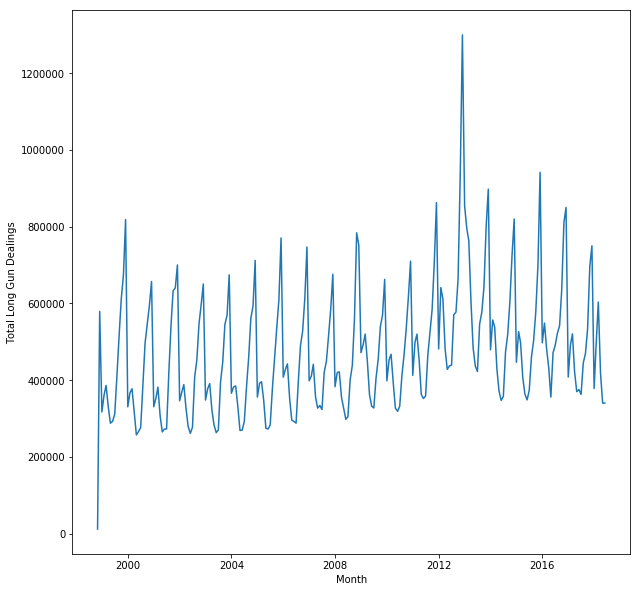

In [120]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.lineplot(x=NumberOfLongGunsBought.index,y="Total Long Gun Dealings",data=NumberOfLongGunsBought)